<a href="https://colab.research.google.com/github/manojyamasani/DataScience_Projects/blob/main/02.%20EDA_on_Haberman_Dataset/EDA_on_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt
import seaborn as sns
haber=pd.read_csv('haberman.csv')
haber

**In the haberman dataset the attributes are mentioned as follows:**
1. age    : The age of patient at the time of operation.
2. year   : Year in which patient has undergone the operation.
3. node   : Number of positive auxillary nodes detected in the patient's body.
4. Status :
   1. The patient has survived greater than or equal to 5 years.
   2. The patient has died in less than 5 years after the operation.
           


In the Status column, 1 is replaced with 'Survived' status and 2 is replaced with 'Died' status.

In [ ]:
haber['status']=haber['status'].replace([1,2],['Survived','Died'])
haber

,age,year,nodes,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived
...,...,...,...,...
301,75,62,1,Survived
302,76,67,0,Survived
303,77,65,3,Survived
304,78,65,1,Died


## Objective : To classify whether patient will be able to survive for 5 years or not.
* To define the boundaries for both survival of patients for less than 5 years and greater than 5 years.

In [ ]:
haber.shape

(306, 4)

In [ ]:
haber.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [ ]:
haber['status'].value_counts()

Survived    225
Died         81
Name: status, dtype: int64

* 225 people lived for more than or equal to 5 years after the treatment and renamed as Survived status.
* and 81 people died within 5 years after the treatment and renamed as Died Status.

In [ ]:
haber_g5=haber[haber['status']=='Survived']
haber_l5=haber[haber['status']=='Died']

In [ ]:
haber_g5

,age,year,nodes,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived
...,...,...,...,...
298,73,68,0,Survived
300,74,63,0,Survived
301,75,62,1,Survived
302,76,67,0,Survived


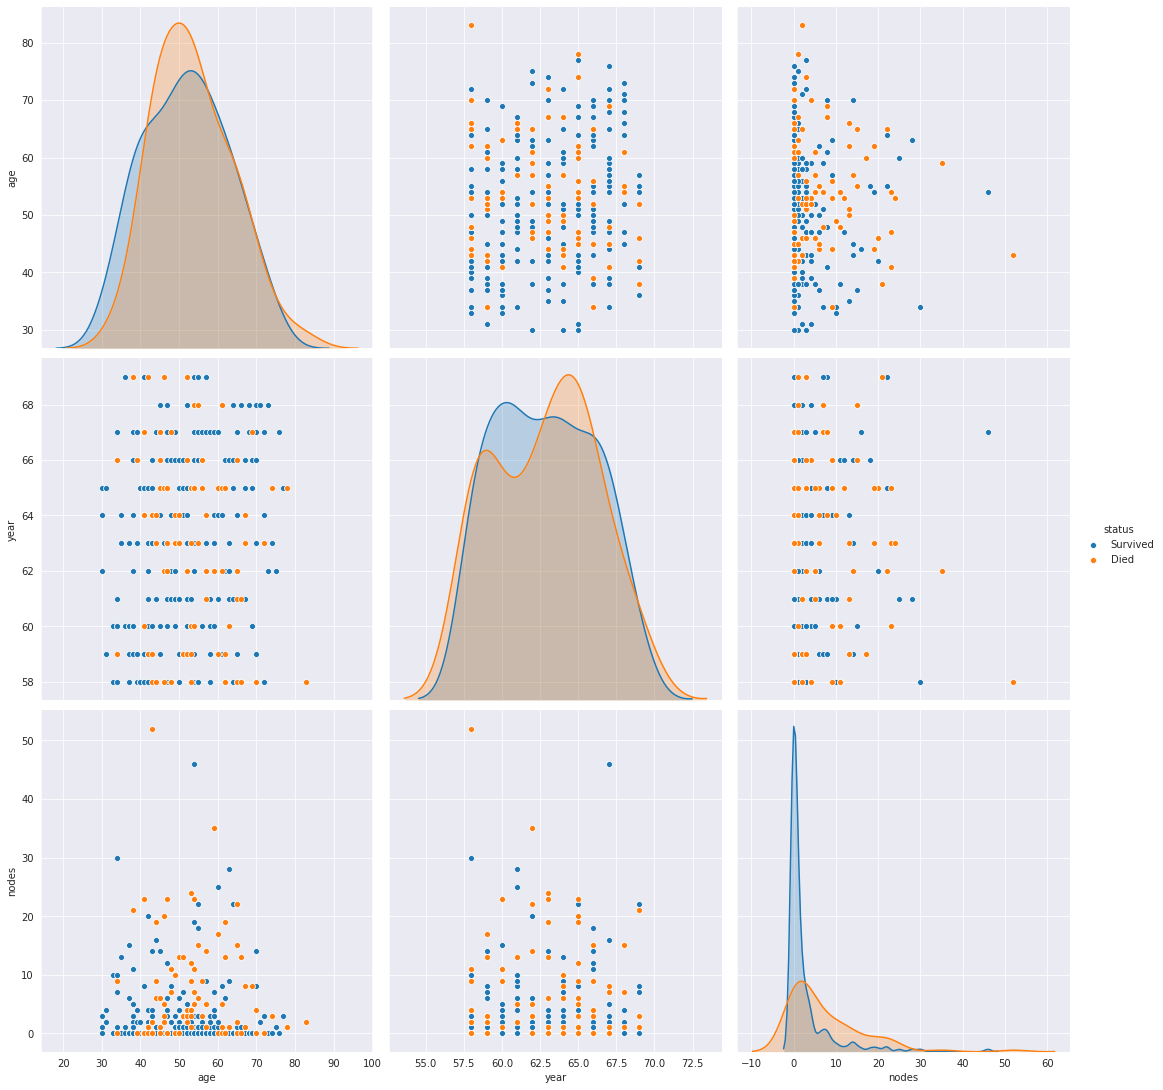

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(haber,hue='status',height=5)
plt.show()

**Observations from the pairplot are as follows**
1. pdfs of 3 features are overlapping for Survived and Died status people.
2. we can not draw a simple line to separate the two classes observed from the remaining 3 scatter plots.
3. Data is not linearly separable.

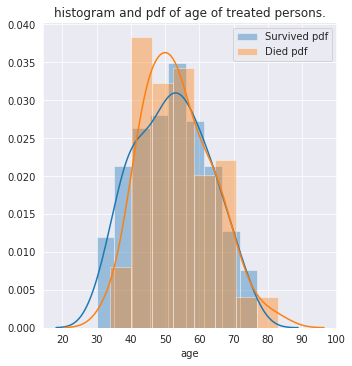

In [ ]:
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "age")


plt.title('histogram and pdf of age of treated persons.')
plt.legend(['Survived pdf','Died pdf'])
plt.show();

The distribution of Died people(people who died within 5 years after the surgery.)follows Normal distribution.
The distribution of survived people does not follow the exact normal distribution.

**Observations:**
1. For the people whose age is less than 35 years, we can surely say that they have survived or lived for more than 5 years.
2. For people of age greater than 35, pdfs are overlapping. we can not make the correct conclusions.

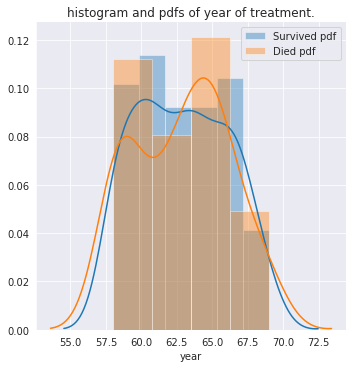

In [ ]:
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "year") \

plt.title('histogram and pdfs of year of treatment.')
plt.legend(['Survived pdf','Died pdf'])

plt.show();

Both pdfs are overlapping, so we can not make a better conclusion.

1. The people who has undergone treatment in years between 1963 and 1966 have high probability of dying and in years between 1960 to 1962 have high probability  of surviving.

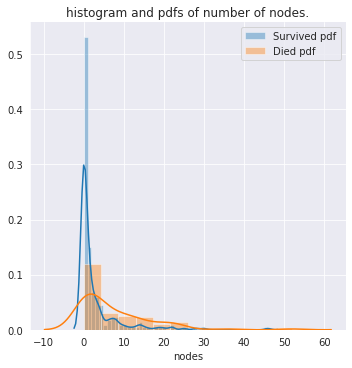

In [ ]:
sns.FacetGrid(haber, hue="status", height=5) \
   .map(sns.distplot, "nodes")

plt.title('histogram and pdfs of number of nodes.')
plt.legend(['Survived pdf','Died pdf'])

plt.show();

 As there is a high probability observed in less number of nodes of survived people we may make some conclusions when we observe cdf of the nodes data.

[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


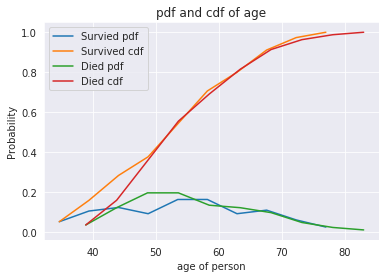

In [ ]:
hist,binedges=np.histogram(haber_g5['age'],density=True)
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
print(binedges)
print(pdf)
print(cdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

hist,binedges=np.histogram(haber_l5['age'],density=True)
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
print(binedges)
print(pdf)
print(cdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

plt.legend(['Survied pdf', 'Survived cdf','Died pdf', 'Died cdf'])
plt.xlabel('age of person')
plt.ylabel('Probability')
plt.title("pdf and cdf of age")
plt.show()

The observations are

1. It seems that people who are treated within the age range of 35 to 75 are frequent.
2. As the pdfs and cdfs are overlapping we can not make much conclusions here .

[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


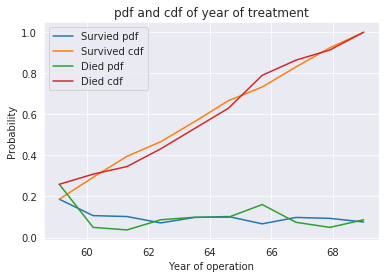

In [ ]:
hist,binedges=np.histogram(haber_g5['year'])
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
print(binedges)
print(pdf)
print(cdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)


hist,binedges=np.histogram(haber_l5['year'])
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
print(binedges)
print(pdf)
print(cdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

plt.legend(['Survied pdf', 'Survived cdf','Died pdf', 'Died cdf'])
plt.xlabel('Year of operation')
plt.ylabel('Probability')
plt.title("pdf and cdf of year of treatment")

plt.show()

The pdf of year of operation of people who survived greater than 5 years is evenly distributed having almost similar probabilities on every year. Whereas distribution of died people is distributed with sudden jump probabilities in between.

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


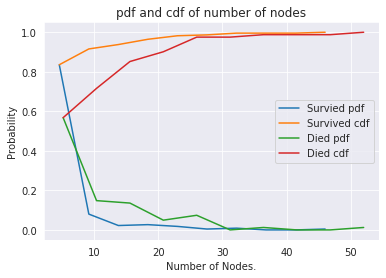

In [ ]:
hist,binedges=np.histogram(haber_g5['nodes'],density=True)
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
print(binedges)
print(pdf)
print(cdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)


hist,binedges=np.histogram(haber_l5['nodes'],density=True)
pdf=hist/sum(hist)
cdf=np.cumsum(pdf)
print(binedges)
print(pdf)
print(cdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

plt.legend(['Survied pdf', 'Survived cdf','Died pdf', 'Died cdf'])
plt.xlabel('Number of Nodes.')
plt.ylabel('Probability')
plt.title("pdf and cdf of number of nodes")


plt.show()

From the above two pdfs and cdfs we can make following conclusions:
1. More people who has survived for more than 5 years have less than 4 nodes as observed from pdf of nodes of survived people.
2. almost 83 % of people who lived more than 5 years have less than 4 nodes.
3. we can make an approximate threshold that if a person has more than 4 nodes the probability of being died within 5 years is high.

## Box Plots

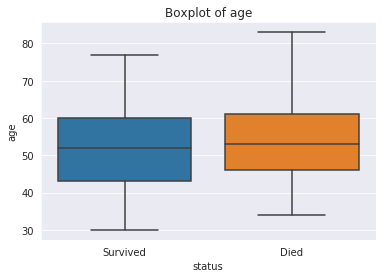

In [ ]:
sns.boxplot(x='status',y='age',data=haber)
plt.title("Boxplot of age")
plt.show()

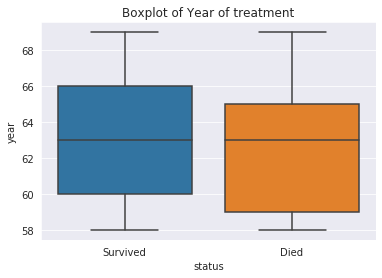

In [ ]:
sns.boxplot(x='status',y='year',data=haber)
plt.title("Boxplot of Year of treatment")
plt.show()

The people who are treated after 1966 have the high probability of surviving after 5 years

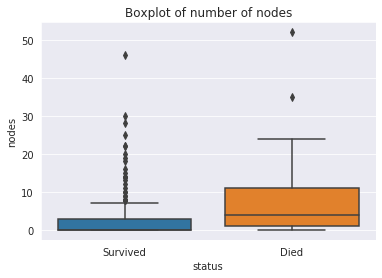

In [ ]:
sns.boxplot(x='status',y='nodes',data=haber)
plt.title("Boxplot of number of nodes")
plt.show()

1. From the above plot we can observe that nodes of people who survived even after 5 years of treatment is very densely distributed upto 4 nodes.

2. Where as the people who died within 5 years has their nodes as widely distributed with it's 50th percentile as higher than 75th percentile of nodes of survived people.

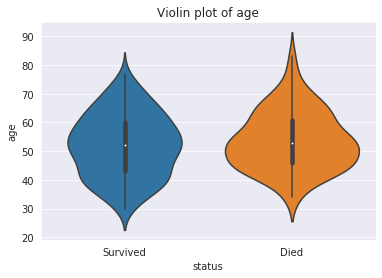

In [ ]:
sns.violinplot(x='status',y='age',data=haber)
plt.title("Violin plot of age")
plt.show()

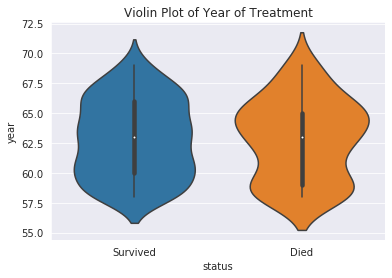

In [ ]:
sns.violinplot(x='status',y='year',data=haber)
plt.title("Violin Plot of Year of Treatment")
plt.show()

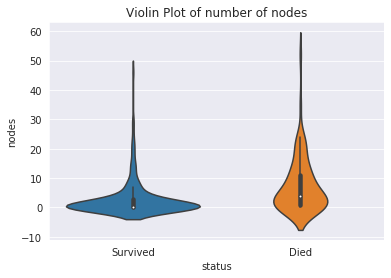

In [ ]:
sns.violinplot(x='status',y='nodes',data=haber)
plt.title("Violin Plot of number of nodes")
plt.show()

**Observations from box and violin plots**
1. More People of who survived after 5 years have age range 50 to 60 where as more people of who died within 5 years have age range 45 to 55.
2. More people who have survived have done their surgeries from 1959 to 1961 wheras more people who died have done surgeries from 1963 to 1966.
3. Nodes of survived people is more normally distributed with 50th percentile of almost 1 node and nodes of died people have 50th percentile as almost 5 nodes.

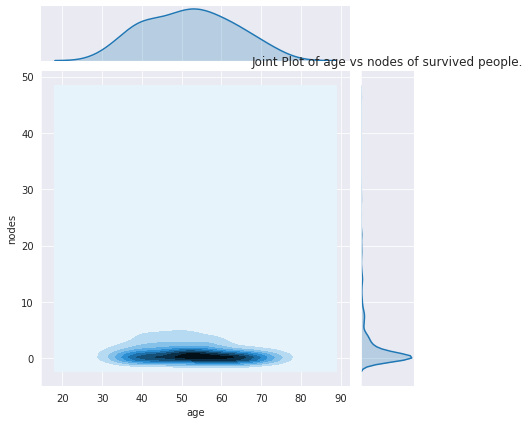

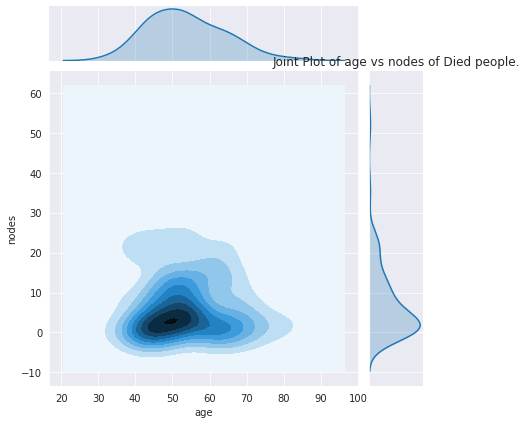

In [ ]:
sns.jointplot(x="age", y="nodes", data=haber_g5, kind="kde")
plt.title("Joint Plot of age vs nodes of survived people.")

sns.jointplot(x="age", y="nodes", data=haber_l5, kind="kde")
plt.title("Joint Plot of age vs nodes of Died people.")


plt.show();


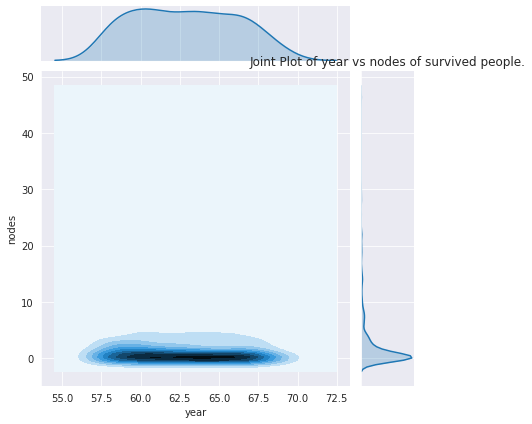

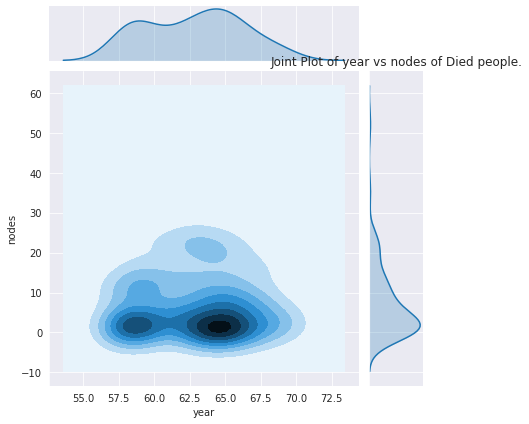

In [ ]:
sns.jointplot(x="year", y="nodes", data=haber_g5, kind="kde")
plt.title("Joint Plot of year vs nodes of survived people.")

sns.jointplot(x="year", y="nodes", data=haber_l5, kind="kde");
plt.title("Joint Plot of year vs nodes of Died people.")

plt.show();


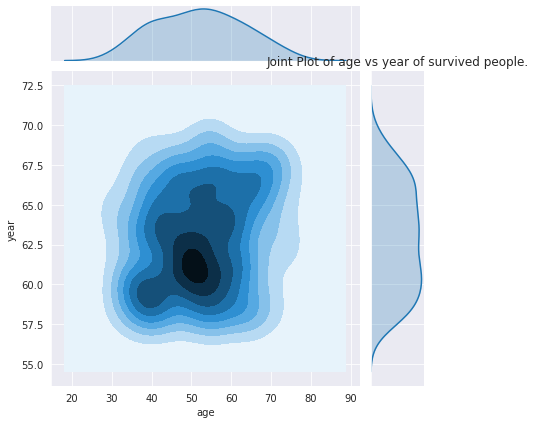

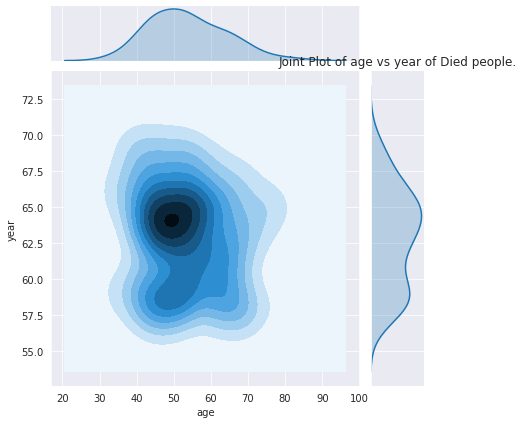

In [ ]:
sns.jointplot(x="age", y="year", data=haber_g5, kind="kde")
plt.title("Joint Plot of age vs year of survived people.")

sns.jointplot(x="age", y="year", data=haber_l5, kind="kde");
plt.title("Joint Plot of age vs year of Died people.")

plt.show();

In the above Joint pdfs all are unimodal pdfs except year vs nodes joint pdf of died poeple which is multimodal distribution and has two modes.

**Conclusions:**
1. From above all, we can come to a single conclusion that the people who has very less number of positive cancer nodes have survived for more than 5 years after the treatment.
2. More people who were in the age of 45 to 55 and whose treatment is done between 1962 and 1965 died within 5 years after the treatment.
3. More people who were in the age of 45 to 55 and whose treatment is done between 1958 and 1962 have survived more than 5 years after the treatment.
4. Due to a high overlapping nature of pdf and cdfs of both survived and died people for all combinations of features, we can not make better conclusions.
5. Data is non linearly separable data
6. We may draw better conclusions if we build any complex models on input data.